In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("economic_index.csv")
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


### Dropping unneccessary columns

In [3]:
df.drop(columns=["Unnamed: 0", "year", "month"], axis=1, inplace=True)
# already droped so error occurs

Checking for null value

In [24]:
df.isnull().sum()   #sometimes you may need to write df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

### some visualization

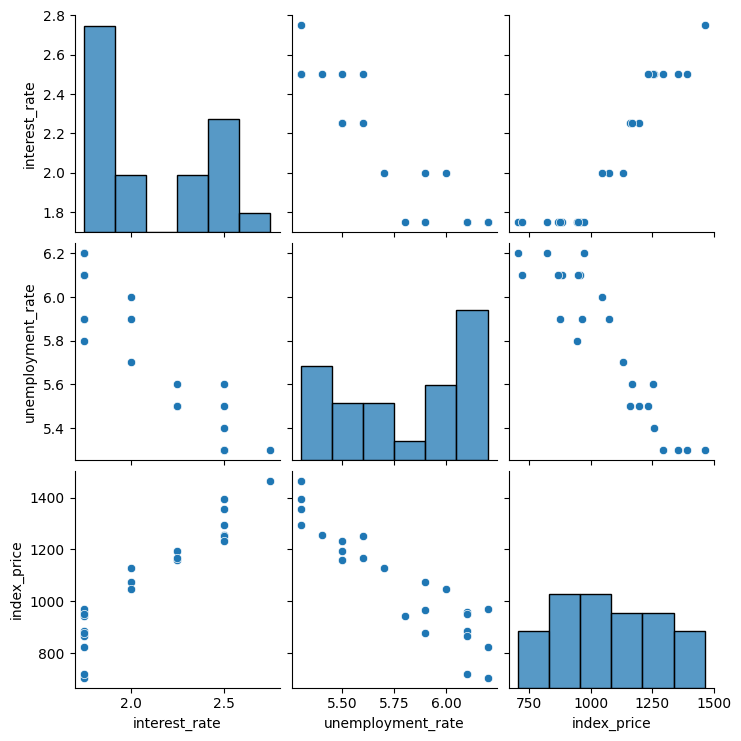

In [4]:
import seaborn as sns
sns.pairplot(df)

checking correlation

In [26]:
df.corr()   # it has some negative corelation

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


visualize datapoints mmore closely

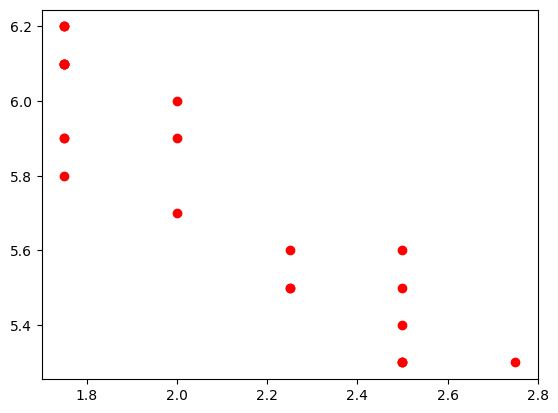

In [30]:
plt.scatter(df['interest_rate'], df["unemployment_rate"], color="r")    # you can see a inverse relationship

## independent and dependent feature

In [6]:
X = df[["interest_rate", "unemployment_rate"]] #or df.iloc[:, :-1]
y = df["index_price"]
print(X)

    interest_rate  unemployment_rate
0            2.75                5.3
1            2.50                5.3
2            2.50                5.3
3            2.50                5.3
4            2.50                5.4
5            2.50                5.6
6            2.50                5.5
7            2.25                5.5
8            2.25                5.5
9            2.25                5.6
10           2.00                5.7
11           2.00                5.9
12           2.00                6.0
13           1.75                5.9
14           1.75                5.8
15           1.75                6.1
16           1.75                6.2
17           1.75                6.1
18           1.75                6.1
19           1.75                6.1
20           1.75                5.9
21           1.75                6.2
22           1.75                6.2
23           1.75                6.1


In [34]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

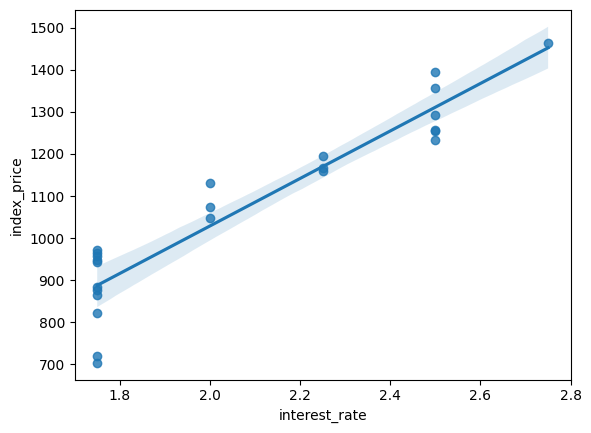

In [8]:
sns.regplot(x = df["interest_rate"], y = df["index_price"], data=df)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

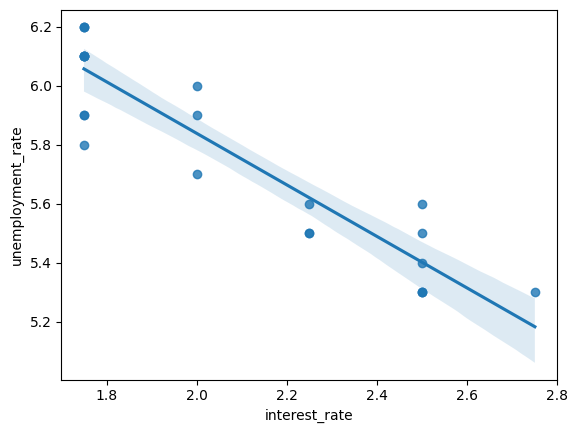

In [40]:
sns.regplot(x = df["interest_rate"], y = df["unemployment_rate"], data=df)
# inverse relationship

## Standardization

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_test

array([[ 0.36115756, -0.82078268],
       [-1.08347268,  1.33377186],
       [ 1.8057878 , -1.43636969],
       [-1.08347268,  1.02597835],
       [-0.36115756,  0.41039134],
       [ 0.36115756, -0.51298918]])

In [ ]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)